Importing Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Importing data from Kaggle

In [2]:
data = pd.read_csv('House Price Prediction.csv')

In [3]:
print(data)

      Living Area  Bathrooms  Bedrooms  Lot Size  Age  Fireplace    Price
0           1.982        1.0         3      2.00  133          0  14.2212
1           1.676        1.5         3      0.38   14          1  13.4865
2           1.694        2.0         3      0.96   15          1  11.8007
3           1.800        1.0         2      0.48   49          1  13.8297
4           2.088        1.0         3      1.84   29          1  12.9470
...           ...        ...       ...       ...  ...        ...      ...
1042        1.802        2.0         4      0.97   56          1  10.7695
1043        3.239        3.5         4      2.50    1          1  23.6737
1044        1.440        2.0         2      0.61   66          1  15.4829
1045        2.030        2.5         3      1.00    3          1  17.9492
1046        2.097        2.5         3      1.93   10          1  18.9108

[1047 rows x 7 columns]


In [4]:
#printing the first 5 rows of the dataframe
data.head()

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
0,1.982,1.0,3,2.00,133,0,14.2212
1,1.676,1.5,3,0.38,14,1,13.4865
2,1.694,2.0,3,0.96,15,1,11.8007
3,1.800,1.0,2,0.48,49,1,13.8297
4,2.088,1.0,3,1.84,29,1,12.9470


In [5]:
#printing the last 5 rows of the dataframe
data.tail()

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
1042,1.802,2.0,4,0.97,56,1,10.7695
1043,3.239,3.5,4,2.50,1,1,23.6737
1044,1.440,2.0,2,0.61,66,1,15.4829
1045,2.030,2.5,3,1.00,3,1,17.9492
1046,2.097,2.5,3,1.93,10,1,18.9108


In [6]:
# Summary statistics of the dataset
print(data.describe())

       Living Area    Bathrooms     Bedrooms     Lot Size          Age  \
count  1047.000000  1047.000000  1047.000000  1047.000000  1047.000000   
mean      1.807303     1.918338     3.183381     0.569580    28.061127   
std       0.641461     0.641735     0.750265     0.777879    34.900899   
min       0.672000     1.000000     1.000000     0.000000     0.000000   
25%       1.336000     1.500000     3.000000     0.210000     6.000000   
50%       1.672000     2.000000     3.000000     0.390000    18.000000   
75%       2.206000     2.500000     4.000000     0.600000    34.000000   
max       4.534000     4.500000     6.000000     9.000000   247.000000   

         Fireplace        Price  
count  1047.000000  1047.000000  
mean      0.593123    16.386213  
std       0.491486     6.765156  
min       0.000000     1.685800  
25%       0.000000    11.201400  
50%       1.000000    15.191700  
75%       1.000000    20.523500  
max       1.000000    44.643600  


In [7]:
# Check for missing values
print(data.isnull().sum())

Living Area    0
Bathrooms      0
Bedrooms       0
Lot Size       0
Age            0
Fireplace      0
Price          0
dtype: int64


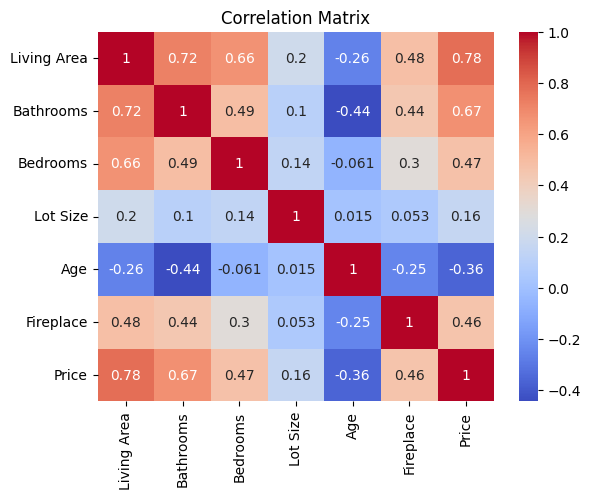

In [8]:
# Correlation matrix to understand feature relationships
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Splitting the data into Features and Targets

In [11]:
# Preprocessing: Selecting features and target variable
x = data[['Living Area', 'Bathrooms','Bedrooms', 'Lot Size', 'Age', 'Fireplace', 'Price']]
y = data['Price']

Splitting the data into Training and Testing sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Building the Linear Regression Model

In [14]:
# Building the Linear Regression Model
lr = LinearRegression()

# Fitting the model on the training data
lr.fit(X_train, y_train)

LinearRegression()

Model Evaluation

In [15]:
# Model Evaluation
y_pred = lr.predict(X_test)

# Mean Squared Error and R-squared for model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3.49700161044224e-29
R-squared: 1.0


 Predictions and Visualization:

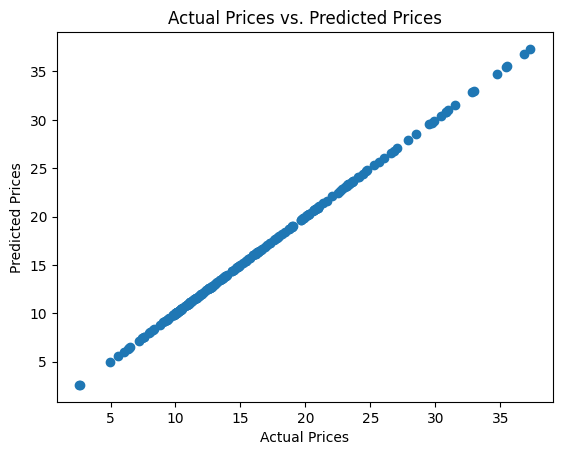

In [16]:
# To visualize the predictions against actual prices, we'll use a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

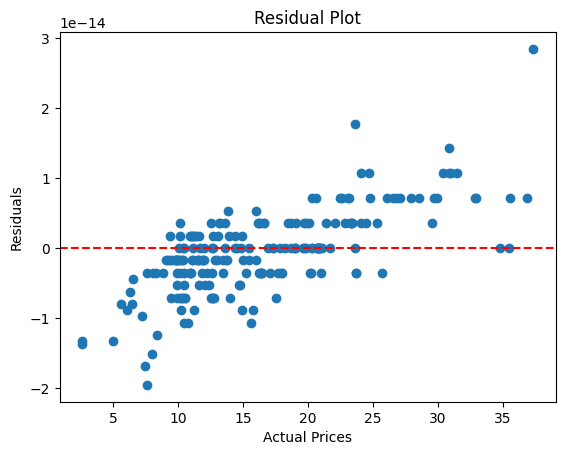

In [17]:
# We can also create a residual plot to check the model's performance
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [22]:
# Let's use the trained model to make predictions on new data and visualize the results
new_data = [[2.6593, 2, 2, 1.76, 20, 1, 30]]
predicted_price = lr.predict(new_data)

print("Predicted Price:", predicted_price[0])

Predicted Price: 29.999999999999982


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
